In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import correlation_functions as cf
import seaborn as sns

In [54]:
#importing csv files with pandas as dataframes
Movies_Id= pd.read_csv("MovieLens/movies.csv")
User_Ratings= pd.read_csv("MovieLens/ratings.csv")

In [55]:
#Not arranged in any way, simply printing the matrix as it is
print(len(Movies_Id['title']), "movies")
Movies_Id.head()


9742 movies


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
#Not arranged in any way, simply printing the matrix as it is
print(len(User_Ratings['userId']), "ratings")
User_Ratings.head()

100836 ratings


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [57]:
#dropping the column we dont need
User_Ratings.drop('timestamp', axis=1, inplace=True)
User_Ratings.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [58]:
#we create a new frame with the function pivot in order to be able to work with the rating values
URatings_PD=pd.pivot_table(User_Ratings, values='rating', index='userId', columns='movieId', fill_value=0)
URatings_PD.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


In [59]:
#number of users
len(URatings_PD)

610

In [60]:
#We transpose our current data frame for convenience since we'll be working with dictionaries
a=URatings_PD.transpose()
#We create the dictionary user-movie
Dict_byUser=a.to_dict()
#We alse create a dictionary movie-user just in case
Dict_byMovies=URatings_PD.to_dict()
#We check the rows/columns to check if in fact these are ordered by user or by movie
print("By User")
print(len(Dict_byUser))
print(len(Dict_byUser[1]))
print("By Movies")
print(len(Dict_byMovies))
print(len(Dict_byMovies[1]))

By User
610
9724
By Movies
9724
610


In [61]:
f=cf.topMatches(Dict_byUser,2, n=20)
f

[(0.297982494083313, 366),
 (0.2773662824142973, 417),
 (0.27334188279706134, 378),
 (0.25205138868302196, 550),
 (0.24066824127587122, 189),
 (0.23826203329283088, 528),
 (0.23745709377546736, 461),
 (0.2351466475180224, 495),
 (0.23177071156247347, 435),
 (0.23138911639381912, 279),
 (0.2261743508986767, 247),
 (0.22386618012238113, 25),
 (0.21940540911588602, 65),
 (0.2167033797114796, 317),
 (0.21622244776845892, 582),
 (0.21192825130400145, 515),
 (0.20923864757696292, 209),
 (0.20923801334611822, 227),
 (0.20843934618634136, 424),
 (0.20653092348579208, 537)]

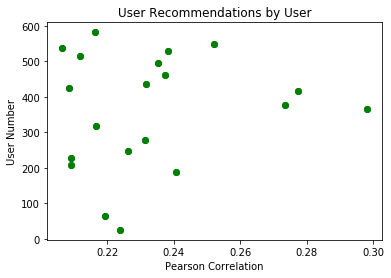

In [62]:
x_val = [x[0] for x in f]
y_val = [y[1] for y in f]
plt.title('User Recommendations by User')
plt.xlabel('Pearson Correlation')
plt.ylabel('User Number')
plt.plot(x_val,y_val,'og')
plt.plot(x_val,y_val, 'og')
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (20, 1) and (20,))

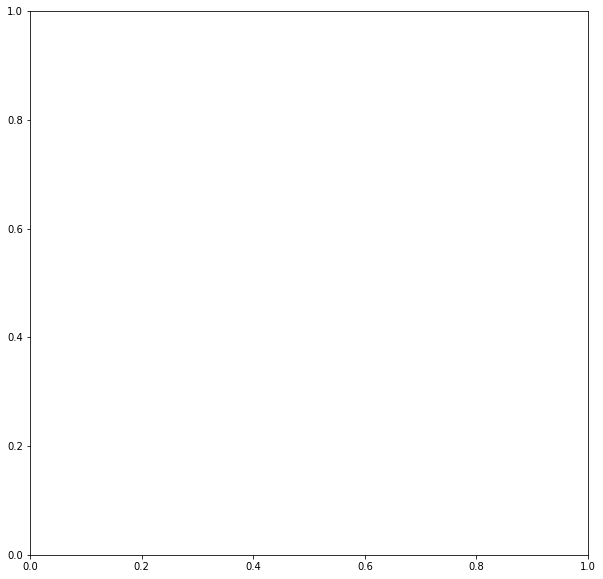

In [64]:
#We declare the figure to plot and what size the axis' will be 
fig, ax = plt.subplots(figsize=(10, 10))
#we call the fucntion heatmat from seaborn to succesfully plot the heatmap of the correlation matrix 
#(and just because the example is like this, we'll use the colors RdBu)
#We also use the annotations characteristic to show the Pearson coefficient for every relation
sns.heatmap(x_val,y_val, cmap = 'RdBu', annot=True)
#We export the image to a png file under the name BostonHW in the same folder the file is saved
plt.savefig('BostonHW.png')
#We declare the labels of each indicator/feature to display in the x and y axis
labels=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV',]
#We declare the size of the labels letters and specify the rotation to 0 for y labels, that way we can read it horizontally
ax.set_xticklabels(labels,fontsize=10)
ax.set_yticklabels(labels,rotation=0,fontsize=10)
#Finally we display the heatmap
plt.show()

In [14]:
k=cf.getRecommendations(Dict_byUser,2)
k[:20]

[(2.911788589109215, 2571),
 (2.8237109528844915, 356),
 (2.8064370283264366, 2959),
 (2.4962798428727804, 296),
 (2.3133639241236166, 7153),
 (2.28227948594746, 4993),
 (2.261935656115974, 593),
 (2.0946614818680263, 5952),
 (2.0281270278971477, 260),
 (1.9047983770468544, 858),
 (1.8812387783553928, 50),
 (1.8394763712233568, 527),
 (1.7998447414887855, 2028),
 (1.771291049206082, 4226),
 (1.7109716560491008, 1196),
 (1.7101329997035526, 1198),
 (1.6879950798834116, 47),
 (1.6820529195962277, 2858),
 (1.6071347873859498, 2329),
 (1.5903245368760766, 110)]

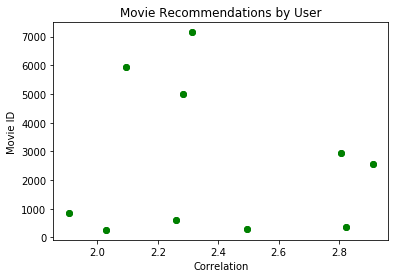

In [47]:
x_val = [x[0] for x in k[:10]]
y_val = [y[1] for y in k[:10]]
plt.title('Movie Recommendations by User')
plt.xlabel('Correlation')
plt.ylabel('Movie ID')
plt.plot(x_val,y_val,'og')
plt.plot(x_val,y_val, 'og')
plt.show()

In [11]:
Dict_MID=Movies_Id.to_dict()
Dict_MID

{'movieId': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 14,
  14: 15,
  15: 16,
  16: 17,
  17: 18,
  18: 19,
  19: 20,
  20: 21,
  21: 22,
  22: 23,
  23: 24,
  24: 25,
  25: 26,
  26: 27,
  27: 28,
  28: 29,
  29: 30,
  30: 31,
  31: 32,
  32: 34,
  33: 36,
  34: 38,
  35: 39,
  36: 40,
  37: 41,
  38: 42,
  39: 43,
  40: 44,
  41: 45,
  42: 46,
  43: 47,
  44: 48,
  45: 49,
  46: 50,
  47: 52,
  48: 53,
  49: 54,
  50: 55,
  51: 57,
  52: 58,
  53: 60,
  54: 61,
  55: 62,
  56: 63,
  57: 64,
  58: 65,
  59: 66,
  60: 68,
  61: 69,
  62: 70,
  63: 71,
  64: 72,
  65: 73,
  66: 74,
  67: 75,
  68: 76,
  69: 77,
  70: 78,
  71: 79,
  72: 80,
  73: 81,
  74: 82,
  75: 83,
  76: 85,
  77: 86,
  78: 87,
  79: 88,
  80: 89,
  81: 92,
  82: 93,
  83: 94,
  84: 95,
  85: 96,
  86: 97,
  87: 99,
  88: 100,
  89: 101,
  90: 102,
  91: 103,
  92: 104,
  93: 105,
  94: 106,
  95: 107,
  96: 108,
  97: 110,
  98: 111,
  99: 1

In [27]:
#Searches through people who also liked the desired movies and based on their ratings of other movies the user gets a recommendation
movie_based=cf.transformPrefs(Dict_byUser)
m=cf.topMatches(movie_based,346)
m

[(0.7333688492286553, 2891),
 (0.7112334541301117, 4488),
 (0.5754861874160602, 1922),
 (0.5734523233577146, 3539),
 (0.5696078326201593, 2271)]

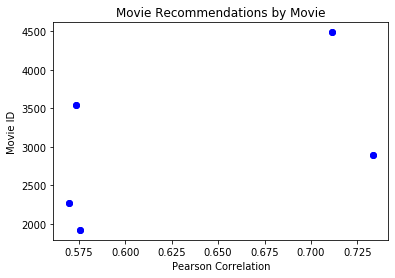

In [48]:
x_val = [x[0] for x in m[:10]]
y_val = [y[1] for y in m[:10]]
plt.title('Movie Recommendations by Movie')
plt.xlabel('Pearson Correlation')
plt.ylabel('Movie ID')
plt.plot(x_val,y_val,'ob')
plt.plot(x_val,y_val, 'ob')
plt.show()

In [29]:
#Returns Users who also liked a particular movie
v=cf.getRecommendations(movie_based,346)
v

[(1.0166701084600527, 474),
 (0.8503181042330432, 599),
 (0.5879068422372169, 182),
 (0.5586656157000807, 448),
 (0.5419017604380237, 606),
 (0.5349284734822033, 288),
 (0.5045740203293939, 274),
 (0.49223123629440274, 387),
 (0.48412835659895564, 68),
 (0.444408820624208, 380),
 (0.4094304280254939, 610),
 (0.3985673740404164, 480),
 (0.3948066065894535, 597),
 (0.38541072579555047, 555),
 (0.380974931871083, 307),
 (0.3764406018679132, 608),
 (0.34415938094528714, 590),
 (0.33865372743160926, 275),
 (0.332881502457752, 177),
 (0.31814921947499125, 249),
 (0.3178949877823826, 469),
 (0.31745717598985923, 19),
 (0.3126290290334443, 140),
 (0.29873863030346354, 64),
 (0.29228837543763087, 318),
 (0.2909367124845709, 91),
 (0.2889673109712187, 202),
 (0.2889474251915899, 477),
 (0.2845292746625609, 232),
 (0.2822247652145767, 489),
 (0.2821647677731148, 156),
 (0.27651526203030624, 483),
 (0.2693303310517014, 391),
 (0.2682480150286997, 57),
 (0.2662718695484495, 217),
 (0.25860826779471

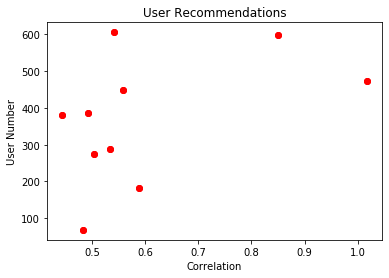

In [49]:
x_val = [x[0] for x in v[:10]]
y_val = [y[1] for y in v[:10]]
plt.title('User Recommendations')
plt.xlabel('Correlation')
plt.ylabel('User Number')
plt.plot(x_val,y_val,'or')
plt.plot(x_val,y_val, 'or')
plt.show()